# P11
Daniel Tytkowski

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [11]:
N = 2000
p = 0.01
G = nx.erdos_renyi_graph(N, p)

In [55]:
def run_simulation(G, beta, gamma, initial_infected_frac, T):
    N = len(G.nodes())
    state = np.zeros(N, dtype=int)
    initial_infected = np.random.choice(
        N, int(N * initial_infected_frac), replace=False
    )
    state[initial_infected] = 1

    # --- SIS simulation ---
    I_frac = []

    for _ in range(T):
        new_state = state.copy()
        for i in G.nodes():
            if state[i] == 0:  # susceptible
                infected_neighbors = sum(state[j] for j in G.neighbors(i))
                prob = 1 - (1 - beta) ** infected_neighbors
                if np.random.rand() < prob:
                    new_state[i] = 1
            else:  # infected
                if np.random.rand() < gamma:
                    new_state[i] = 0
        state = new_state
        I_frac.append(np.mean(state))

    # Plot frac infected
    plt.figure(figsize=(7,4))
    plt.plot(I_frac, label="Simulation")
    plt.xlabel("Time")
    plt.ylabel("Fraction infected")
    plt.title("SIS model on given ER graph")
    plt.legend()
    plt.grid()
    plt.show()

    # Analytical data
    simulated_i_inf = np.mean(I_frac[-10:])
    avg_k = np.mean([d for _, d in G.degree()])
    lambda_sim = beta / gamma
    lambda_c = 1 / avg_k
    
    print(f'Average degree: {avg_k}')
    print(f'beta / gamma = lambda = {lambda_sim}')
    print(f'lambda_c = {1/avg_k}')

    if lambda_sim > lambda_c:
        analytical_i_inf = 1 - 1 / (lambda_sim * avg_k)
        print("lambda > lambda_c, infection should reach steady state")
    else:
        analytical_i_inf = 0
        print("lambda < lambda_c, infection should die out")

    

    print(f'Simulated fraction of infected in infinity: {simulated_i_inf}')
    print(f'Analytical fraction of infected in infinity: {analytical_i_inf}')

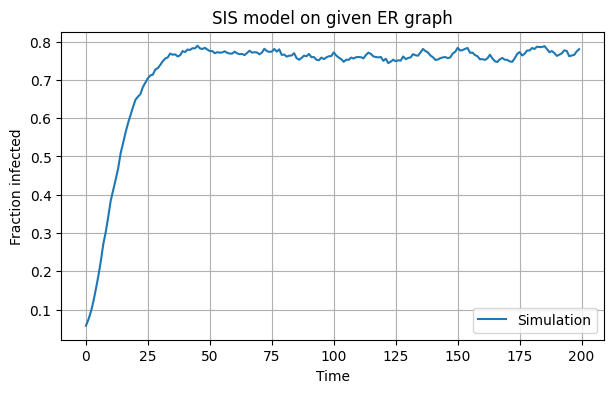

beta / gamma = lambda = 1.0
lambda_c = 0.1669170422300117
lambda > lambda_c, infection should reach steady state
Simulated fraction of infected in infinity: 0.76935
Analytical fraction of infected in infinity: 0.8330829577699883


In [26]:
run_simulation(G, beta=0.04, gamma=0.04, initial_infected_frac=0.05, T=200)

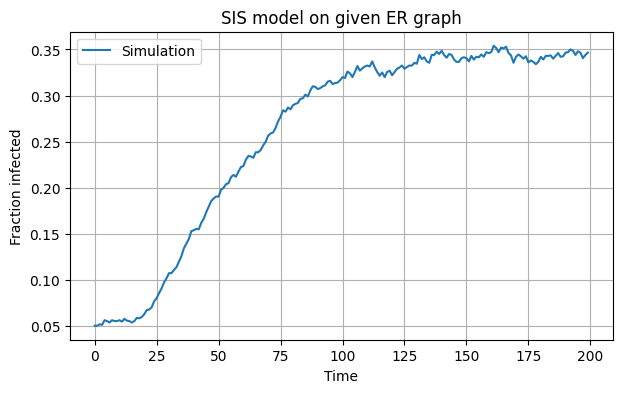

beta / gamma = lambda = 0.25
lambda_c = 0.1669170422300117
lambda > lambda_c, infection should reach steady state
Simulated fraction of infected in infinity: 0.34614999999999996
Analytical fraction of infected in infinity: 0.33233183107995323


In [27]:
run_simulation(G, beta=0.01, gamma=0.04, initial_infected_frac=0.05, T=200)

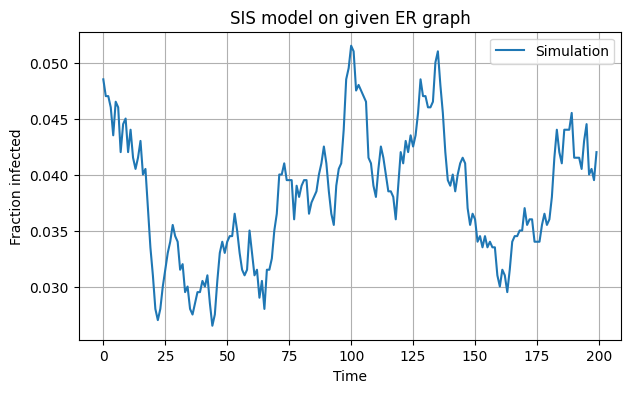

beta / gamma = lambda = 0.09999999999999999
lambda_c = 0.1669170422300117
lambda < lambda_c, infection should die out
Simulated fraction of infected in infinity: 0.041449999999999994
Analytical fraction of infected in infinity: 0


In [28]:
run_simulation(G, beta=0.01, gamma=0.1, initial_infected_frac=0.05, T=200)

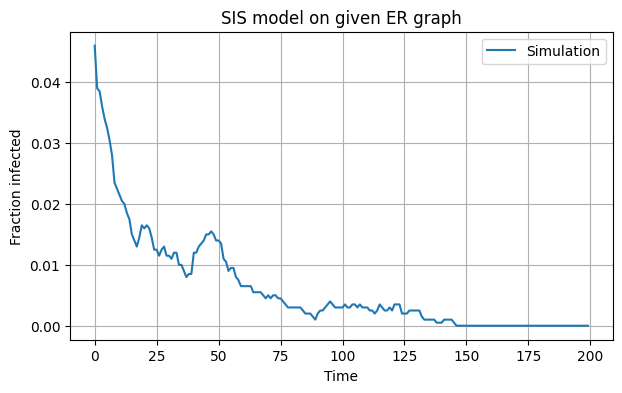

beta / gamma = lambda = 0.049999999999999996
lambda_c = 0.1669170422300117
lambda < lambda_c, infection should die out
Simulated fraction of infected in infinity: 0.0
Analytical fraction of infected in infinity: 0


In [29]:
run_simulation(G, beta=0.005, gamma=0.1, initial_infected_frac=0.05, T=200)

## Task 2

In [17]:
N = 2000
m = 3          
G = nx.barabasi_albert_graph(N, m)

In [57]:
def run_simulation_ba(G, beta, gamma, initial_infected_frac, T):
    N = len(G.nodes())
    state = np.zeros(N, dtype=int)
    initial_infected = np.random.choice(
        N, int(N * initial_infected_frac), replace=False
    )
    state[initial_infected] = 1

    # sis simulation
    I_frac = []

    for _ in range(T):
        new_state = state.copy()
        for i in G.nodes():
            if state[i] == 0:  # susceptible
                infected_neighbors = sum(state[j] for j in G.neighbors(i))
                prob = 1 - (1 - beta) ** infected_neighbors
                if np.random.rand() < prob:
                    new_state[i] = 1
            else:  # infected
                if np.random.rand() < gamma:
                    new_state[i] = 0
        state = new_state
        I_frac.append(np.mean(state))

    # Plot frac infected
    plt.figure(figsize=(7,4))
    plt.plot(I_frac, label="Simulation")
    plt.xlabel("Time")
    plt.ylabel("Fraction infected")
    plt.title("SIS model on given BA graph")
    plt.legend()
    plt.grid()
    plt.show()

    # Analytical data
    simulated_i_inf = np.mean(I_frac[-10:])
    degrees = np.array([d for _, d in G.degree()])
    avg_k = degrees.mean()
    avg_k2 = (degrees ** 2).mean()
    lambda_sim = beta / gamma
    lambda_c = avg_k / avg_k2
    
    print(f'Average degree: {avg_k}')
    print(f'Average degree^2: {avg_k2}')
    print(f'beta / gamma = lambda = {lambda_sim}')
    print(f'lambda_c = {1/avg_k}')

    if lambda_sim > lambda_c:
        analytical_i_inf = 1 - 1 / (lambda_sim * avg_k)
        print("lambda > lambda_c, infection should reach steady state")
    else:
        analytical_i_inf = 0
        print("lambda < lambda_c, infection should die out")

    

    print(f'Simulated fraction of infected in infinity: {simulated_i_inf}')
    print(f'Analytical fraction of infected in infinity: {analytical_i_inf}')

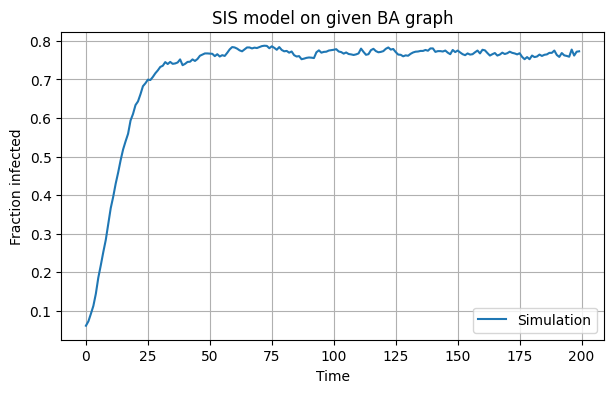

beta / gamma = lambda = 1.0
lambda_c = 0.1669170422300117
lambda > lambda_c, infection should reach steady state
Simulated fraction of infected in infinity: 0.7657499999999999
Analytical fraction of infected in infinity: 0.8330829577699883


In [23]:
run_simulation_ba(G, beta=0.04, gamma=0.04, initial_infected_frac=0.05, T=200)

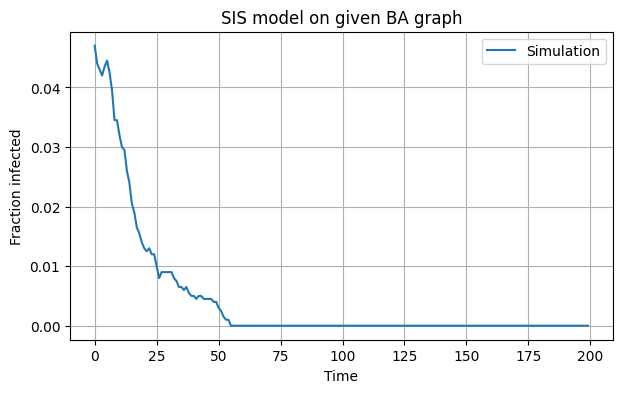

beta / gamma = lambda = 0.049999999999999996
lambda_c = 0.1669170422300117
lambda < lambda_c, infection should die out
Simulated fraction of infected in infinity: 0.0
Analytical fraction of infected in infinity: 0


In [24]:
run_simulation_ba(G, beta=0.005, gamma=0.1, initial_infected_frac=0.05, T=200)

### Difference?

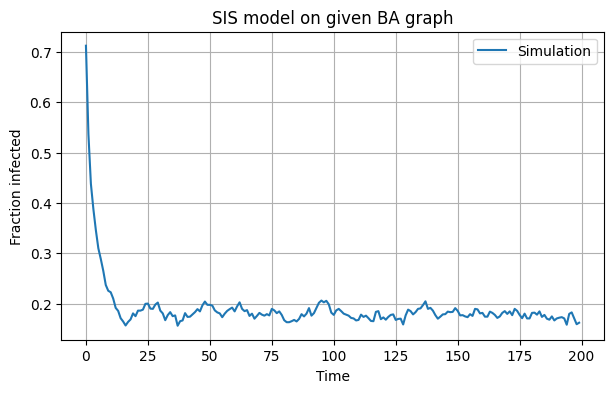

Average degree: 5.991
Average degree^2: 92.292
beta / gamma = lambda = 0.16666666666666669
lambda_c = 0.1669170422300117
lambda > lambda_c, infection should reach steady state
Simulated fraction of infected in infinity: 0.1698
Analytical fraction of infected in infinity: -0.001502253380070151


In [73]:
N = 2000
m = 3          
G = nx.barabasi_albert_graph(N, m)
run_simulation_ba(G, beta=0.05, gamma=0.3, initial_infected_frac=1, T=200)

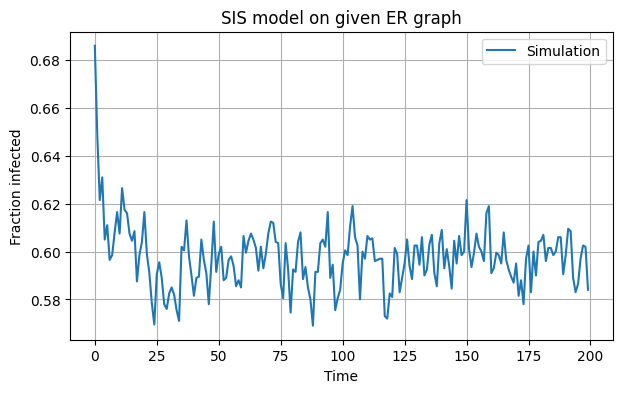

Average degree: 20.089
beta / gamma = lambda = 0.16666666666666669
lambda_c = 0.049778485738463836
lambda > lambda_c, infection should reach steady state
Simulated fraction of infected in infinity: 0.59605
Analytical fraction of infected in infinity: 0.7013290855692169


In [75]:
N = 2000
p = 0.01
G = nx.erdos_renyi_graph(N, p)
run_simulation(G, beta=0.05, gamma=0.3, initial_infected_frac=1, T=200)

## Task 3

Now we introduce another variable to simulation: il - immunity loss

In [ ]:
def run_simulation_sirs(G, beta, gamma, il, initial_infected_frac, T):
    N = len(G.nodes())
    state = np.zeros(N, dtype=int)
    initial_infected = np.random.choice(N, int(initial_infected_frac * N), replace=False)
    state[initial_infected] = 1

    S_frac, I_frac, R_frac = [], [], []

    # simulation
    for _ in range(T):
        new_state = state.copy()
        for i in G.nodes():
            if state[i] == 0:  # S
                infected_neighbors = sum(state[j] == 1 for j in G.neighbors(i))
                prob = 1 - (1 - beta) ** infected_neighbors
                if np.random.rand() < prob:
                    new_state[i] = 1

            elif state[i] == 1:  # I
                if np.random.rand() < gamma:
                    new_state[i] = 2

            else:  # R
                if np.random.rand() < il:
                    new_state[i] = 0

        state = new_state
        S_frac.append(np.mean(state == 0))
        I_frac.append(np.mean(state == 1))
        R_frac.append(np.mean(state == 2))

    # Plot sirs
    plt.figure(figsize=(8,4))
    plt.plot(S_frac, label="S")
    plt.plot(I_frac, label="I")
    plt.plot(R_frac, label="R")
    plt.xlabel("Time")
    plt.ylabel("Fraction of nodes")
    plt.title("SIRS model on given network")
    plt.legend()
    plt.grid()
    plt.show()

In [37]:
N = 2000
m = 3          
G = nx.barabasi_albert_graph(N, m)

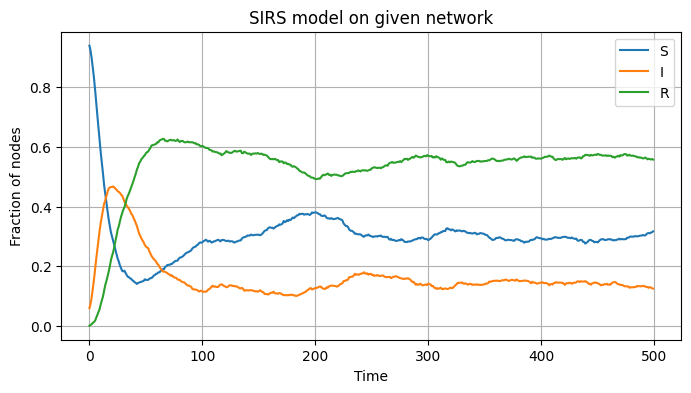

In [38]:
run_simulation_sirs(G, beta=0.04, gamma=0.04, il=0.01, initial_infected_frac=0.05, T=500)

In [39]:
N = 2000
p = 0.01
G = nx.erdos_renyi_graph(N, p)

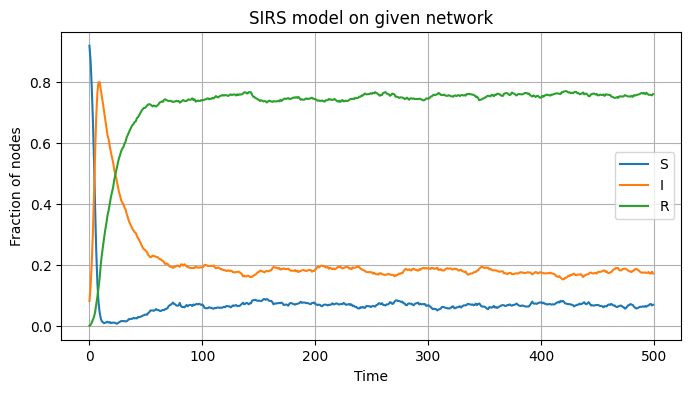

In [40]:
run_simulation_sirs(G, beta=0.04, gamma=0.04, il=0.01, initial_infected_frac=0.05, T=500)

## Task 4

In [8]:
G = nx.barabasi_albert_graph(n=100, m=3)

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [40]:
def simulate_voter_model(G, propaganda=0, stubborn_frac=0.05, initial_votes=None, T=1000):
    
    N = len(G.nodes())
    sigma = np.random.choice([-1, 1], size=N) # initial votes
    stubborn = np.random.rand(N) < stubborn_frac # stubborn treshold
    votes_frac = []

    for _ in range(T):
        i = np.random.randint(N)
        if not stubborn[i]:
            neighbors = list(G.neighbors(i))
            if neighbors:
                m = sum(sigma[j] for j in neighbors) + propaganda
                if m != 0:
                    sigma[i] = np.sign(m)
        votes_frac.append(np.mean(sigma))

    plt.figure(figsize=(7,4))
    plt.plot(votes_frac)
    plt.xlabel("Time")
    plt.ylabel("Average opinion")
    plt.title("Modified voter model")
    plt.grid()
    plt.show()


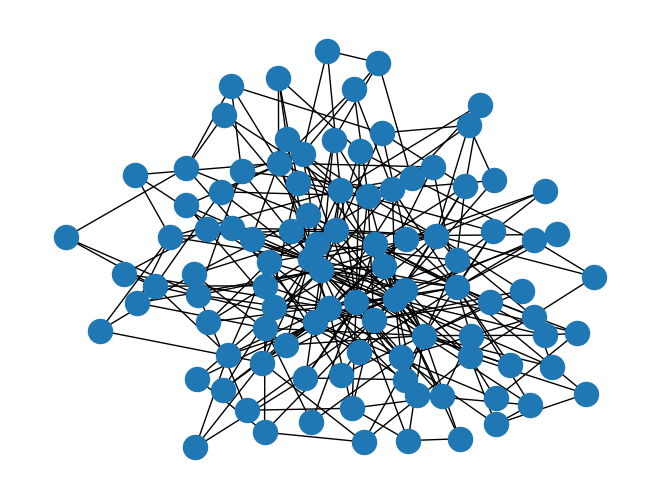

In [9]:
nx.draw(G)

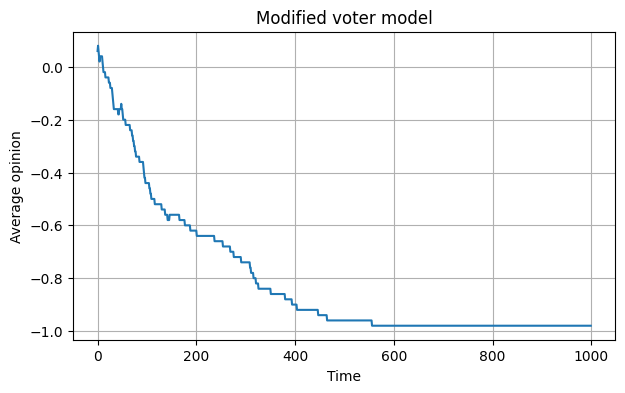

In [24]:
simulate_voter_model(G=G, propaganda=0.1, stubborn_frac=0.01, T=1000)

In [37]:
def modular_clique_graph(num_groups=5, group_size=10, inter_links=5):
    G = nx.Graph()
    group_nodes = []

    node_id = 0
    for g in range(num_groups):
        nodes = list(range(node_id, node_id + group_size))
        node_id += group_size

        # Complete graph (clique)
        for i in nodes:
            for j in nodes:
                if i < j:
                    G.add_edge(i, j)

        group_nodes.append(nodes)

    # Random inter-group edges
    for g1 in range(num_groups):
        for g2 in range(g1 + 1, num_groups):
            for _ in range(inter_links):
                u = np.random.choice(group_nodes[g1])
                v = np.random.choice(group_nodes[g2])
                G.add_edge(u, v)

    return G, group_nodes


In [44]:
G, groups= modular_clique_graph()

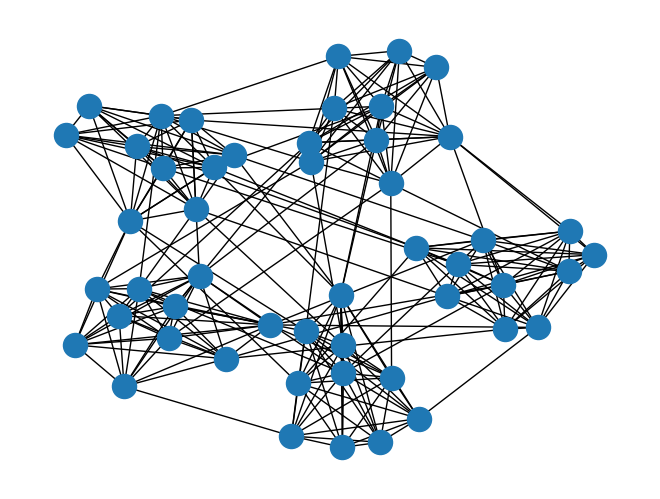

In [45]:
nx.draw(G)

In [51]:
N = G.number_of_nodes()

sigma = np.zeros(N, dtype=int)

for idx, group in enumerate(groups):
    opinion = 1 if idx % 2 == 0 else -1
    sigma[group] = opinion

color_map = ['tab:blue' if sigma[i] == 1 else 'tab:red' for i in G.nodes()]

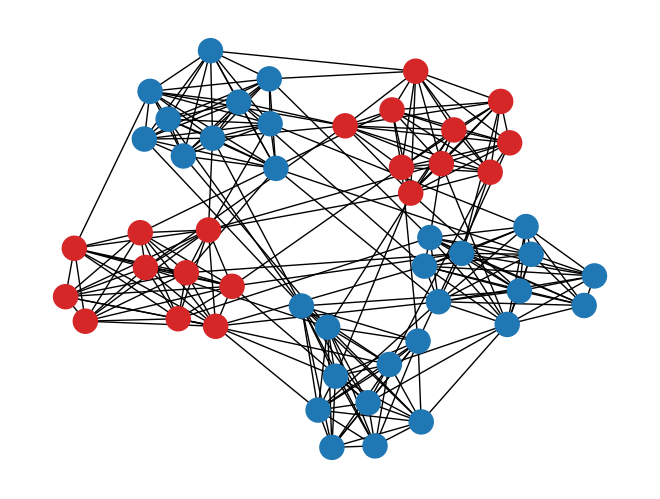

In [52]:
nx.draw(G, node_color=color_map)

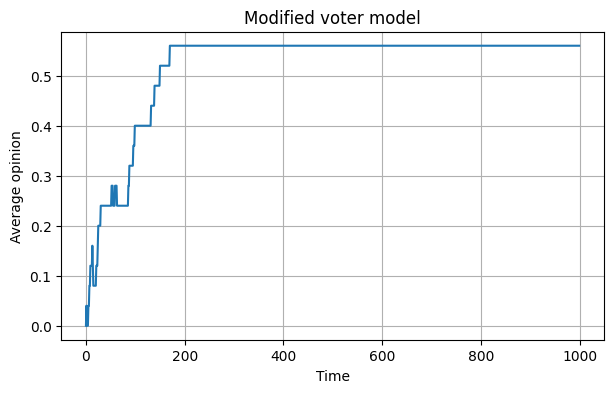

In [55]:
simulate_voter_model(G=G, propaganda=0.1, stubborn_frac=0.05, initial_votes=sigma)